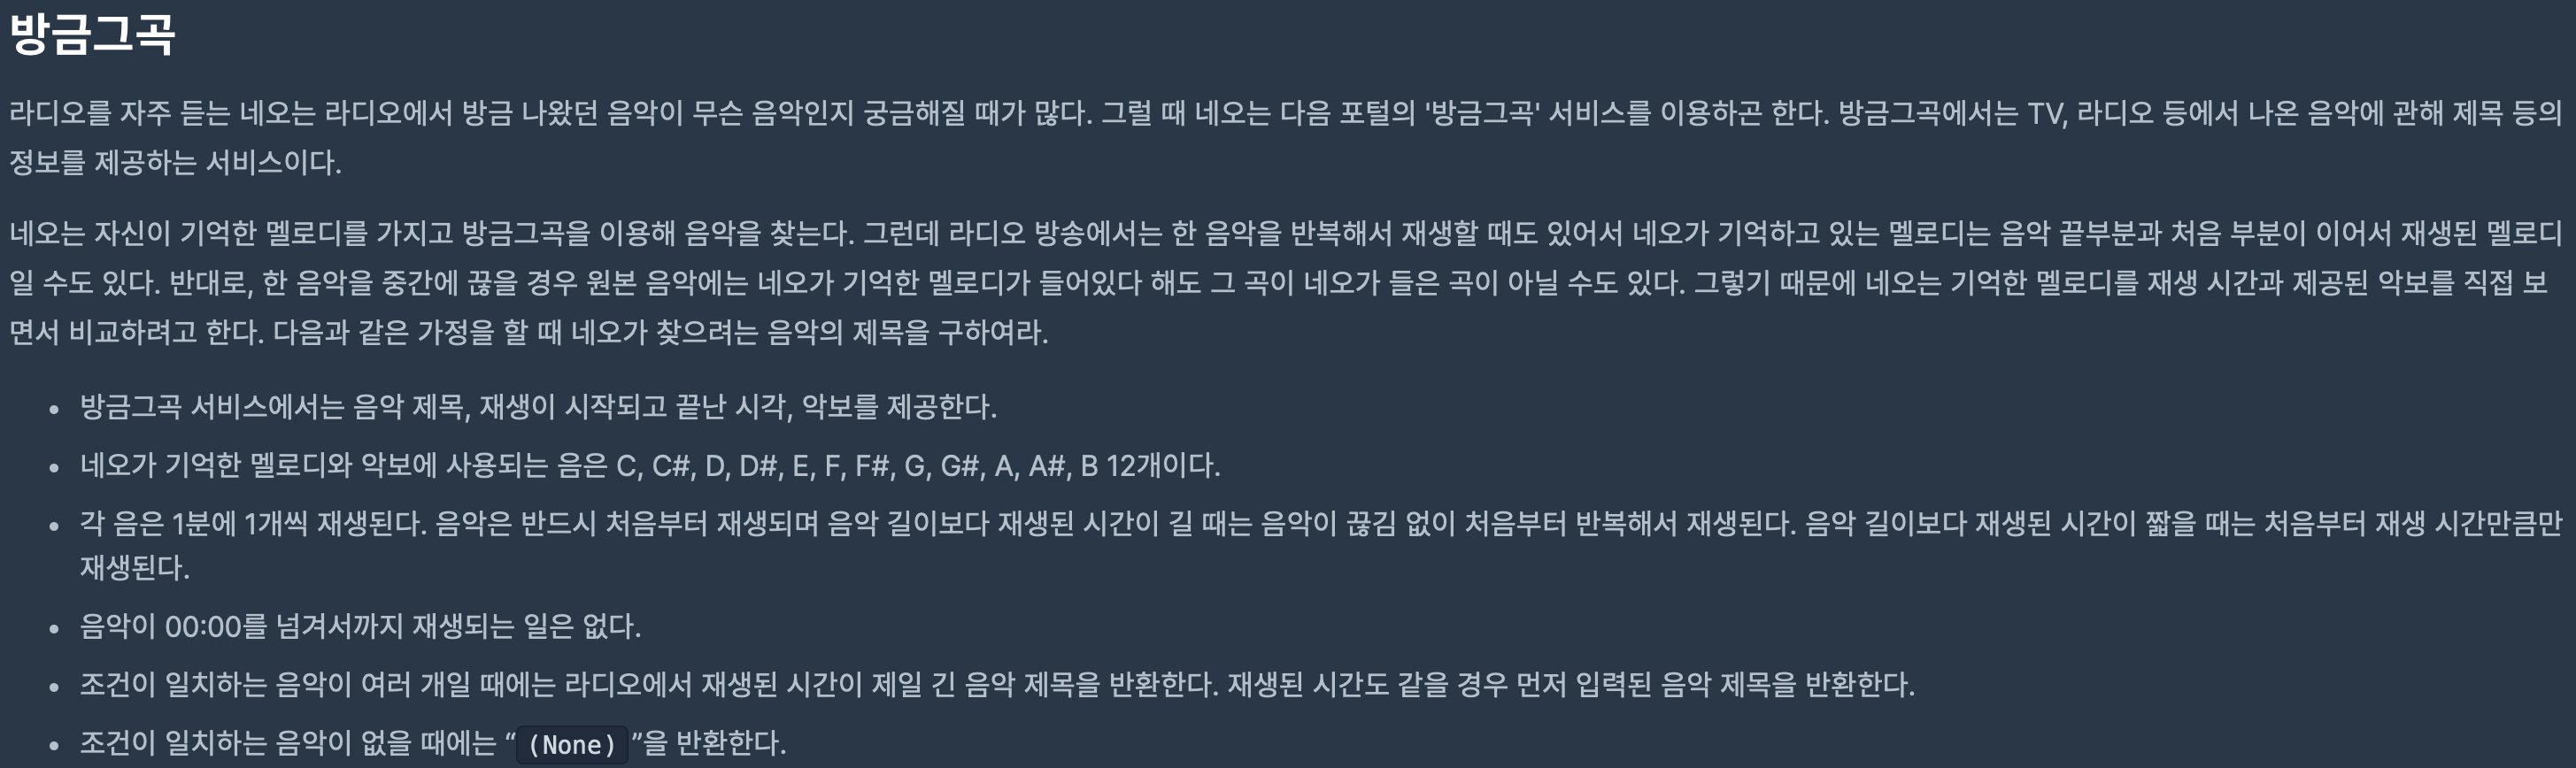

In [2]:
m = "ABC"
musicinfos = ["12:00,12:14,HELLO,C#DEFGAB", "13:00,13:05,WORLD,ABCDEF"]

def change_code(c):

    note_dic = {'C#':'1', 'D#':'2', 'F#':'3', 'G#':'4', 'A#':'5'}
    for k,v in note_dic.items():

        c = c.replace(k,v)

    return c

def solution(m, musicinfos):

    from datetime import datetime
    
    answer = []

    m = change_code(m)

    for idx, info in enumerate(musicinfos):
        
        info = info.split(',')
        start_time = info[0]
        end_time = info[1]
        song = info[2]

        code_list = info[3]
        code_list = change_code(code_list)

        length = len(code_list)
  
        time1 = datetime.strptime(start_time, "%H:%M")
        time2 = datetime.strptime(end_time, "%H:%M")

        # 두 시간의 차이를 계산
        time_difference = time2 - time1
        time_difference = (time_difference/60).seconds
        
        if time_difference >= length:

            full_code_list = code_list * (time_difference // length) + code_list[:time_difference % length]

        else:

            full_code_list = code_list[:length]

        if m in full_code_list:

            answer.append([time_difference, idx, song])

    if len(answer) == 0:

        answer = "(None)"
    
    else:

        answer = sorted(answer, key = lambda x: (-x[0], x[1]))[0][2]

    return answer

solution(m, musicinfos)

'WORLD'